# Exploratory Data Analysis using Python - A Case Study

*Analyzing responses from the Stack Overflow Annual Developer Survey 2020*

![](https://i.imgur.com/qXhHKqv.png)



The following topics are covered in this tutorial:

- Selecting and downloading a dataset
- Data preparation and cleaning
- Exploratory analysis and visualization
- Asking and answering interesting questions
- Summarizing inferences and drawing conclusions

## Introduction

In this tutorial, we'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey.

There are several options for getting the dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the `urlretrieve` function from the `urllib.request` to download CSV files from a raw URL
- Use a helper library, e.g., [`opendatasets`](https://github.com/JovianML/opendatasets), which contains a collection of curated datasets and provides a helper function for direct download.

We'll use the `opendatasets` helper library to download the files.

In [1]:
# !pip install opendatasets --quiet

In [2]:
# import opendatasets as od

In [3]:
# od.download('stackoverflow-developer-survey-2020')

Let's verify that the dataset was downloaded into the directory `stackoverflow-developer-survey-2020` and retrieve the list of files in the dataset.

In [4]:
import os

In [5]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

You can through the downloaded files using the "File" > "Open" menu option in Jupyter. It seems like the dataset contains three files:

- `README.txt` - Information about the dataset
- `survey_results_schema.csv` - The list of questions, and shortcodes for each question
- `survey_results_public.csv` - The full list of responses to the questions 

Let's load the CSV files using the Pandas library. We'll use the name `survey_raw_df` for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [6]:
import pandas as pd

In [7]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [8]:
survey_raw_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


The dataset contains over 64,000 responses to 60 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame. 

In [9]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [10]:
survey_raw_df.MainBranch.unique()

array(['I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a student who is learning to code', nan], dtype=object)

It appears that shortcodes for questions have been used as column names. 

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: `Column` and `QuestionText`. We can load it as Pandas Series with `Column` as the index and the  `QuestionText` as the value.

In [11]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [12]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

We can now use `schema_raw` to retrieve the full question text for any column in `survey_raw_df`.

In [13]:
schema_raw['CompFreq']

'Is that compensation weekly, monthly, or yearly?'

We've now loaded the dataset. We're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [14]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [15]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new data frame `survey_df`. We can continue to modify further without affecting the original data frame.

In [16]:
survey_df = survey_raw_df[selected_columns].copy()

In [17]:
schema = schema_raw[selected_columns]

In [18]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
#     print(schema)

Let's view some basic information about the data frame.

In [19]:
survey_df.shape

(64461, 20)

In [20]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [21]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [22]:
schema['JobSat']

'How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)'

In [23]:
~survey_df['JobSat'].isnull()

0         True
1         True
2        False
3         True
4        False
         ...  
64456    False
64457    False
64458    False
64459    False
64460    False
Name: JobSat, Length: 64461, dtype: bool

In [24]:
# import numpy as np

In [25]:
# np.nan

In [26]:
survey_df[~(survey_df['JobSat'].isnull())]['JobSat']

0                        Slightly satisfied
1                         Very dissatisfied
3                     Slightly dissatisfied
5                        Slightly satisfied
6                            Very satisfied
                        ...                
64147                    Slightly satisfied
64148                    Slightly satisfied
64152                        Very satisfied
64153    Neither satisfied nor dissatisfied
64154    Neither satisfied nor dissatisfied
Name: JobSat, Length: 45194, dtype: object

Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to `NaN`.

In [27]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important


In [28]:
schema['NEWEdImpt']

'How important is a formal education, such as a university degree in computer science, to your career?'

In [29]:
survey_df.NEWEdImpt.unique()

array(['Fairly important', nan, 'Not at all important/not necessary',
       'Very important', 'Somewhat important', 'Critically important'],
      dtype=object)

In [30]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [31]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [32]:
schema['YearsCode']

'Including any education, how many years have you been coding in total?'

In [33]:
schema['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [34]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [35]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Let's now view some basic statistics about numeric columns.

In [36]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [37]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. We can do this using the `.drop` method, [as explained here](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/).

In [38]:
survey_df[(survey_df['Age'] < 5) | (survey_df['Age'] > 100)].shape

(8, 20)

In [39]:
survey_df[survey_df.Age < 5].index

Int64Index([8793, 12271, 20042, 25061, 54687, 58292, 64383], dtype='int64')

In [40]:
survey_df.drop(survey_df[survey_df.Age < 5].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

The same holds for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [41]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.

In [42]:
survey_df['Gender'].value_counts()

Man                                                            45896
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         74
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [43]:
survey_df.Gender.str.contains(';', na=False).sum()

312

In [44]:
import numpy as np

In [45]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [46]:
survey_df['Gender'].value_counts()

Man                                                  45896
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [47]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45069.000000,57027.000000,56340.000000,43794.000000,40813.000000
mean,30.842353,15.485068,12.791374,8.882176,40.026995
std,9.501682,5.113927,9.498516,7.768074,10.626085
min,5.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [48]:
survey_df.sample(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
41963,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,C;C++;Java,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Kotl...,Every few months,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN
58481,Netherlands,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
19094,United States,28.0,Woman,"Other doctoral degree (Ph.D., Ed.D., etc.)","A natural science (such as biology, chemistry,...",Yes,17.0,11.0,10.0,C++;Julia;Python,C++;Julia;Python,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Academic researcher;Scientist,50.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Critically important
35524,United States,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Assembly;C;C++;Python,NaN,Once a year,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
51574,Switzerland,50.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A business discipline (such as accounting, fin...",No,12.0,30.0,19.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Data or business analyst;Developer, back-end;D...",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Fairly important


In [49]:
survey_df.Gender.unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming'], dtype=object)

## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [50]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [51]:
schema.Country

'Where do you live?'

In [52]:
survey_df.Country.nunique()

183

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [53]:
survey_df.Country.value_counts()

United States          12371
India                   8364
United Kingdom          3881
Germany                 3864
Canada                  2175
                       ...  
Nauru                      1
Lesotho                    1
Saint Lucia                1
Antigua and Barbuda        1
Marshall Islands           1
Name: Country, Length: 183, dtype: int64

In [54]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

We can visualize this information using a bar chart.

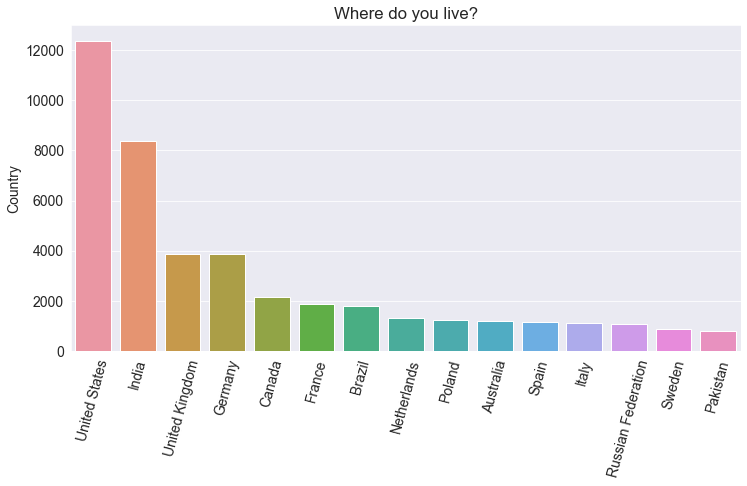

In [55]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

**Exercise**:
Try finding the percentage of responses from English-speaking vs. non-English speaking countries. You can use [this list of languages spoken in different countries](https://github.com/JovianML/opendatasets/blob/master/data/countries-languages-spoken/countries-languages.csv).

In [56]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt'],
      dtype='object')

**Exercise**

In [57]:
# od.download('countries-languages-spoken')

In [58]:
import os

In [59]:
os.listdir('countries-languages-spoken')

['countries-languages.csv']

In [60]:
country_lang_df = pd.read_csv('countries-languages-spoken/countries-languages.csv')

In [61]:
country_lang_df

,Country,Languages Spoken
0,Afghanistan,"Dari Persian, Pashtu (both official), other Tu..."
1,Albania,"Albanian (Tosk is the official dialect), Greek"
2,Algeria,"Arabic (official), French, Berber dialects"
3,Andorra,"Catalán (official), French, Castilian, Portuguese"
4,Angola,"Portuguese (official), Bantu and other African..."
...,...,...
193,Vietnam,Vietnamese (official); English (increasingly f...
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic"
195,Yemen,Arabic
196,Zambia,"English (official); major vernaculars: Bemba, ..."


In [62]:
print(country_lang_df.Country.nunique())
print(survey_df.Country.nunique())

198
183


In [63]:
survey_df.Country.unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic', nan,
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Iran', 'Croatia', 'Egypt', 'Argentina', 'Ghana',
       'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guatemala', '

In [64]:
survey_df_Country_Langs = pd.DataFrame(survey_df.Country.dropna().unique(), columns=['Country'])

In [65]:
survey_df_Country_Langs

,Country
0,Germany
1,United Kingdom
2,Russian Federation
3,Albania
4,United States
...,...
178,Timor-Leste
179,Solomon Islands
180,Cape Verde
181,Gabon


In [66]:
# Sort by Countries so as to do element-wise comparison with 'country_lang_df' dataframe
survey_df_Country_Langs.sort_values(by='Country',inplace=True)
survey_df_Country_Langs.reset_index(drop=True)

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
178,"Venezuela, Bolivarian Republic of..."
179,Viet Nam
180,Yemen
181,Zambia


In [67]:
# Sort by Countries so as to do element-wise comparison with 'survey_df_Country_Langs' dataframe
country_lang_df.sort_values(by='Country',inplace=True)
country_lang_df.reset_index(drop=True)

,Country,Languages Spoken
0,Afghanistan,"Dari Persian, Pashtu (both official), other Tu..."
1,Albania,"Albanian (Tosk is the official dialect), Greek"
2,Algeria,"Arabic (official), French, Berber dialects"
3,Andorra,"Catalán (official), French, Castilian, Portuguese"
4,Angola,"Portuguese (official), Bantu and other African..."
...,...,...
193,Vietnam,Vietnamese (official); English (increasingly f...
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic"
195,Yemen,Arabic
196,Zambia,"English (official); major vernaculars: Bemba, ..."


In [68]:
~survey_df_Country_Langs.Country.isin(country_lang_df.Country)

75     False
3      False
71     False
100    False
160    False
       ...  
63      True
72      True
129    False
132    False
133    False
Name: Country, Length: 183, dtype: bool

In [69]:
# Cleanup and rename countries in 'survey_df_Country_Langs' according to 'country_lang_df'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Brunei Darussalam', 'Country'] = 'Brunei'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Congo, Republic of the...', 'Country'] = 'Congo, Republic of'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Democratic Republic of the Congo', 'Country'] = 'Congo, Democratic Republic of the'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Lao People\'s Democratic Republic', 'Country'] = 'Laos'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Libyan Arab Jamahiriya', 'Country'] = 'Libya'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Micronesia, Federated States of...', 'Country'] = 'Micronesia'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'North Korea', 'Country'] = 'Korea, North'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'South Korea', 'Country'] = 'Korea, South'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Republic of Korea', 'Country'] = 'Korea, South'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Republic of Moldova', 'Country'] = 'Moldova'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Russian Federation', 'Country'] = 'Russia'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Saint Lucia', 'Country'] = 'St. Lucia'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Saint Vincent and the Grenadines', 'Country'] = 'St. Vincent and the Grenadines'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Syrian Arab Republic', 'Country'] = 'Syria'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'The former Yugoslav Republic of Macedonia', 'Country'] = 'Macedonia'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Timor-Leste', 'Country'] = 'East Timor'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'United Republic of Tanzania', 'Country'] = 'Tanzania'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Venezuela, Bolivarian Republic of...', 'Country'] = 'Venezuela'
survey_df_Country_Langs.loc[survey_df_Country_Langs.Country == 'Viet Nam', 'Country'] = 'Vietnam'

In [70]:
sum(~(survey_df_Country_Langs.Country.isin(country_lang_df.Country)))

3

In [71]:
# A check to see if the countries are present in both 'survey_df_Country_Langs' and 'country_lang_df' dataframes
survey_df_Country_Langs['IsLanguageAvailable'] = survey_df_Country_Langs.Country.isin(country_lang_df.Country)
survey_df_Country_Langs.reset_index(drop=True)

,Country,IsLanguageAvailable
0,Afghanistan,True
1,Albania,True
2,Algeria,True
3,Andorra,True
4,Angola,True
...,...,...
178,Venezuela,True
179,Vietnam,True
180,Yemen,True
181,Zambia,True


In [72]:
# These countries are present in 'survey_df_Country_Langs' but not in 'country_lang_df'
survey_df_Country_Langs[~survey_df_Country_Langs['IsLanguageAvailable']]

,Country,IsLanguageAvailable
102,Hong Kong (S.A.R.),False
96,Isle of Man,False
47,Nomadic,False


In [73]:
# Merge 'survey_df_Country_Langs' and 'country_lang_df' dataframes on 'Country' column
survey_df_Country_Langs = pd.merge(survey_df_Country_Langs, country_lang_df, on='Country', how='left')

In [74]:
survey_df_Country_Langs

,Country,IsLanguageAvailable,Languages Spoken
0,Afghanistan,True,"Dari Persian, Pashtu (both official), other Tu..."
1,Albania,True,"Albanian (Tosk is the official dialect), Greek"
2,Algeria,True,"Arabic (official), French, Berber dialects"
3,Andorra,True,"Catalán (official), French, Castilian, Portuguese"
4,Angola,True,"Portuguese (official), Bantu and other African..."
...,...,...,...
178,Venezuela,True,"Spanish (official), numerous indigenous dialects"
179,Vietnam,True,Vietnamese (official); English (increasingly f...
180,Yemen,True,Arabic
181,Zambia,True,"English (official); major vernaculars: Bemba, ..."


In [75]:
# Rename 'Languages Spoken' column to 'LanguagesSpoken'
survey_df_Country_Langs.rename({'Languages Spoken': 'LanguagesSpoken'}, axis=1, inplace=True)
survey_df_Country_Langs

,Country,IsLanguageAvailable,LanguagesSpoken
0,Afghanistan,True,"Dari Persian, Pashtu (both official), other Tu..."
1,Albania,True,"Albanian (Tosk is the official dialect), Greek"
2,Algeria,True,"Arabic (official), French, Berber dialects"
3,Andorra,True,"Catalán (official), French, Castilian, Portuguese"
4,Angola,True,"Portuguese (official), Bantu and other African..."
...,...,...,...
178,Venezuela,True,"Spanish (official), numerous indigenous dialects"
179,Vietnam,True,Vietnamese (official); English (increasingly f...
180,Yemen,True,Arabic
181,Zambia,True,"English (official); major vernaculars: Bemba, ..."


In [76]:
# 'IsEnglishSpeakingCountry' column to mention if the Country uses English as one of its spoken language
survey_df_Country_Langs['IsEnglishSpeakingCountry'] = survey_df_Country_Langs["LanguagesSpoken"].str.contains("English", na=False)
survey_df_Country_Langs.reset_index(drop=True)

,Country,IsLanguageAvailable,LanguagesSpoken,IsEnglishSpeakingCountry
0,Afghanistan,True,"Dari Persian, Pashtu (both official), other Tu...",False
1,Albania,True,"Albanian (Tosk is the official dialect), Greek",False
2,Algeria,True,"Arabic (official), French, Berber dialects",False
3,Andorra,True,"Catalán (official), French, Castilian, Portuguese",False
4,Angola,True,"Portuguese (official), Bantu and other African...",False
...,...,...,...,...
178,Venezuela,True,"Spanish (official), numerous indigenous dialects",False
179,Vietnam,True,Vietnamese (official); English (increasingly f...,True
180,Yemen,True,Arabic,False
181,Zambia,True,"English (official); major vernaculars: Bemba, ...",True


In [77]:
# Cleanup and rename countries in 'survey_df' according to 'survey_df_Country_Langs' or 'country_lang_df'
survey_df.loc[survey_df.Country == 'Brunei Darussalam', 'Country'] = 'Brunei'
survey_df.loc[survey_df.Country == 'Congo, Republic of the...', 'Country'] = 'Congo, Republic of'
survey_df.loc[survey_df.Country == 'Democratic Republic of the Congo', 'Country'] = 'Congo, Democratic Republic of the'
survey_df.loc[survey_df.Country == 'Lao People\'s Democratic Republic', 'Country'] = 'Laos'
survey_df.loc[survey_df.Country == 'Libyan Arab Jamahiriya', 'Country'] = 'Libya'
survey_df.loc[survey_df.Country == 'Micronesia, Federated States of...', 'Country'] = 'Micronesia'
survey_df.loc[survey_df.Country == 'North Korea', 'Country'] = 'Korea, North'
survey_df.loc[survey_df.Country == 'South Korea', 'Country'] = 'Korea, South'
survey_df.loc[survey_df.Country == 'Republic of Korea', 'Country'] = 'Korea, South'
survey_df.loc[survey_df.Country == 'Republic of Moldova', 'Country'] = 'Moldova'
survey_df.loc[survey_df.Country == 'Russian Federation', 'Country'] = 'Russia'
survey_df.loc[survey_df.Country == 'Saint Lucia', 'Country'] = 'St. Lucia'
survey_df.loc[survey_df.Country == 'Saint Vincent and the Grenadines', 'Country'] = 'St. Vincent and the Grenadines'
survey_df.loc[survey_df.Country == 'Syrian Arab Republic', 'Country'] = 'Syria'
survey_df.loc[survey_df.Country == 'The former Yugoslav Republic of Macedonia', 'Country'] = 'Macedonia'
survey_df.loc[survey_df.Country == 'Timor-Leste', 'Country'] = 'East Timor'
survey_df.loc[survey_df.Country == 'United Republic of Tanzania', 'Country'] = 'Tanzania'
survey_df.loc[survey_df.Country == 'Venezuela, Bolivarian Republic of...', 'Country'] = 'Venezuela'
survey_df.loc[survey_df.Country == 'Viet Nam', 'Country'] = 'Vietnam'

In [78]:
# Merge 'survey_df' and 'survey_df_Country_Langs' on 'Country' column
survey_df = pd.merge(survey_df, survey_df_Country_Langs, on='Country', how='left')
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,IsLanguageAvailable,LanguagesSpoken,IsEnglishSpeakingCountry
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,True,German,False
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,True,"English, Welsh, Scots Gaelic",True
2,Russia,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,"Russian, others",False
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,True,"Albanian (Tosk is the official dialect), Greek",False
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,True,"English 82%, Spanish 11% (2000)",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64590,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,...,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,True,"English 82%, Spanish 11% (2000)",True
64591,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,True,"Arabic (official), Berber dialects, French oft...",False
64592,Vietnam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Vietnamese (official); English (increasingly f...,True
64593,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,True,Polish 98% (2002),False


In [79]:
# Drop unwanted columns 'IsLanguageAvailable', 'LanguagesSpoken' from 'survey_df' dataframe
survey_df.drop(columns=['IsLanguageAvailable', 'LanguagesSpoken'], inplace=True)
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,IsEnglishSpeakingCountry
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,False
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,True
2,Russia,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,False
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64590,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,...,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,True
64591,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,False
64592,Vietnam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
64593,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,False


In [80]:
survey_df.IsEnglishSpeakingCountry.value_counts()

True     39649
False    24245
Name: IsEnglishSpeakingCountry, dtype: int64

In [81]:
survey_df.IsEnglishSpeakingCountry.value_counts() * 100 / survey_df.IsEnglishSpeakingCountry.count()

True     62.05434
False    37.94566
Name: IsEnglishSpeakingCountry, dtype: float64

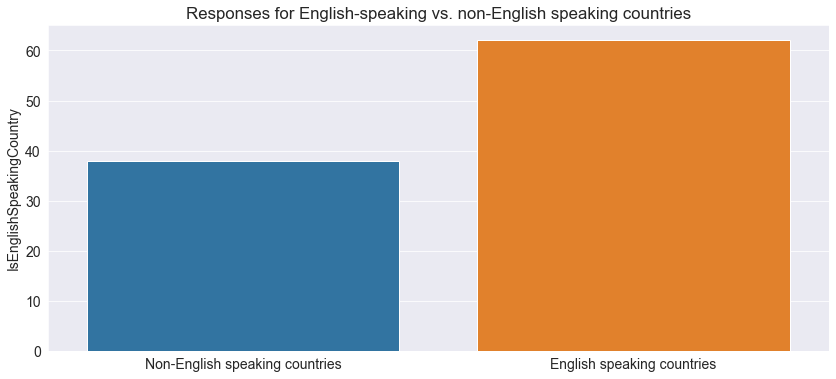

In [82]:
IsEnglishSpeakingCountry_pct = survey_df.IsEnglishSpeakingCountry.value_counts() * 100 / survey_df.IsEnglishSpeakingCountry.count()

plt.figure(figsize=(14, 6))
plt.title('Responses for English-speaking vs. non-English speaking countries')

g = sns.barplot(y=IsEnglishSpeakingCountry_pct, x=IsEnglishSpeakingCountry_pct.index)
g.set_xticks(range(len(IsEnglishSpeakingCountry_pct))) # <--- set the ticks first
g.set_xticklabels(['Non-English speaking countries','English speaking countries']);

### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

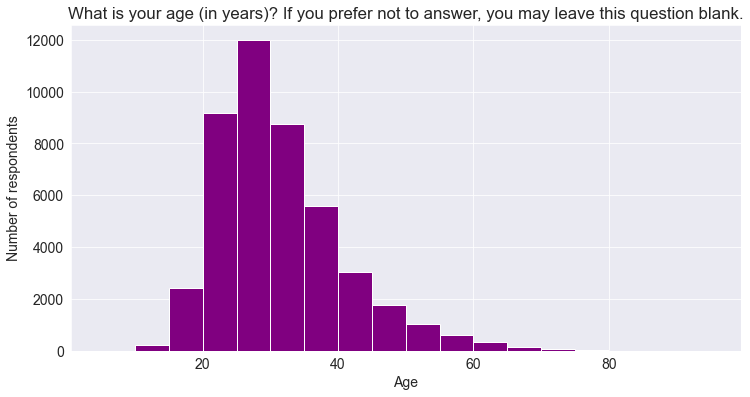

In [83]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(5,100,5), color='purple');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

**Exercise**: You may want to filter out responses by age (or age group) if you'd like to analyze and compare the survey results for different age groups. Create a new column called AgeGroup containing values like `Less than 10 years`, `10-18 years`, `18-30 years`, `30-45 years`, `45-60 years` and `Older than 60 years`. Then, repeat the analysis in the rest of this notebook for each age group.


**Exercise**

In [84]:
age_group_conditions = [survey_df.Age.le(10),
              survey_df.Age.gt(10) & survey_df.Age.le(18),
             survey_df.Age.gt(18) & survey_df.Age.le(30),
             survey_df.Age.gt(30) & survey_df.Age.le(45),
             survey_df.Age.gt(45) & survey_df.Age.le(60),
             survey_df.Age.gt(50)]

age_group_values = ['Less than 10 years', '10-18 years', '18-30 years', '30-45 years', '45-60 years','Older than 60 years']

In [85]:
survey_df['AgeGroup'] = np.select(age_group_conditions, age_group_values)

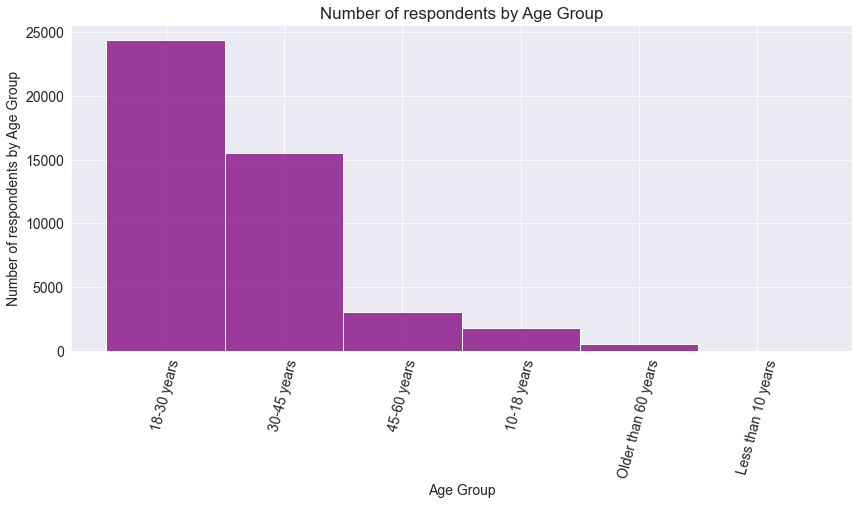

In [86]:
plt.figure(figsize=(14, 6))
plt.title('Number of respondents by Age Group')
plt.xticks(rotation=75)
plt.xlabel('Age Group')
plt.ylabel('Number of respondents by Age Group')

sns.histplot(survey_df.AgeGroup[survey_df.AgeGroup != '0'], color='purple');

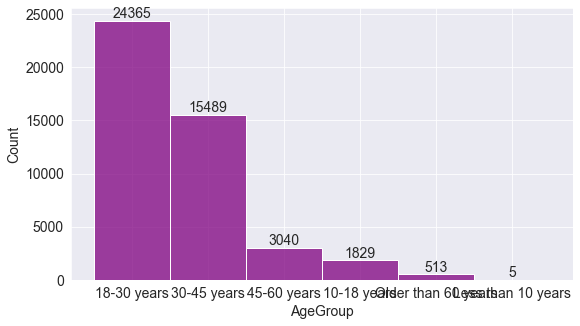

In [87]:
ax = sns.histplot(survey_df.AgeGroup[survey_df.AgeGroup != '0'], color='purple');
ax.bar_label(ax.containers[0]);

### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [88]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [89]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  46076
Woman                                                 3850
Non-binary, genderqueer, or gender non-conforming      386
Name: Gender, dtype: int64

A pie chart would be a great way to visualize the distribution.

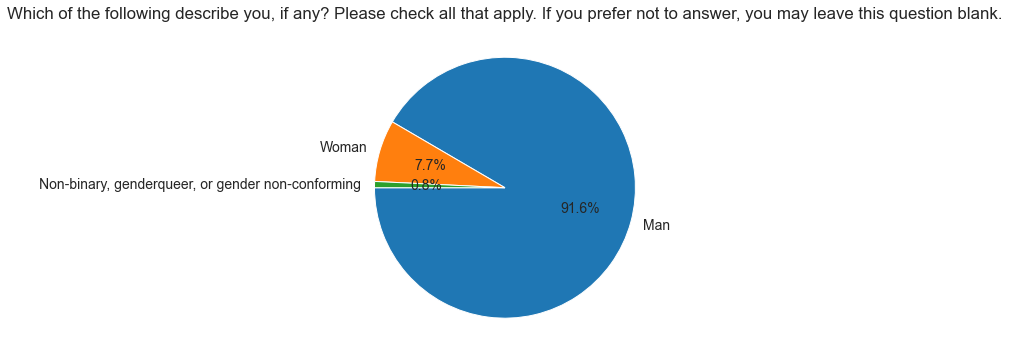

In [90]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%. 

**Exercise**: It would be interesting to compare the survey responses & preferences across genders. Repeat this analysis with these breakdowns. How do the relative education levels differ across genders? You may find this analysis on the [Gender Divide in Data Science](https://medium.com/datadriveninvestor/exploratory-data-analysis-eda-understanding-the-gender-divide-in-data-science-roles-9faa5da44f5b) useful.

**Exercise**

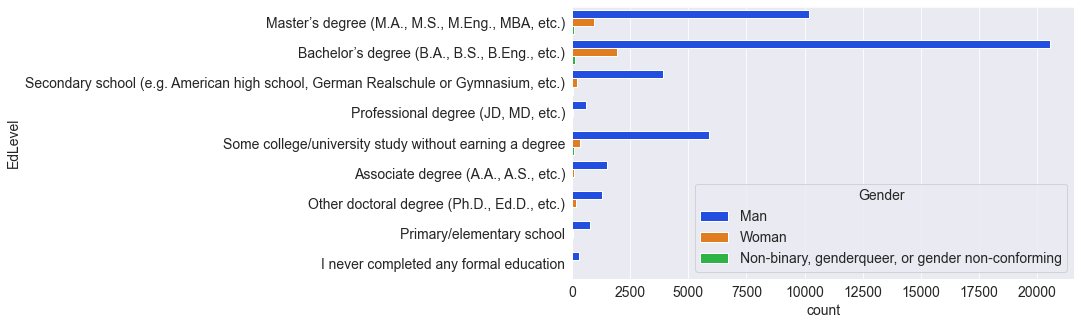

In [91]:
sns.countplot(y=survey_df.EdLevel, hue=survey_df.Gender, palette="bright");

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

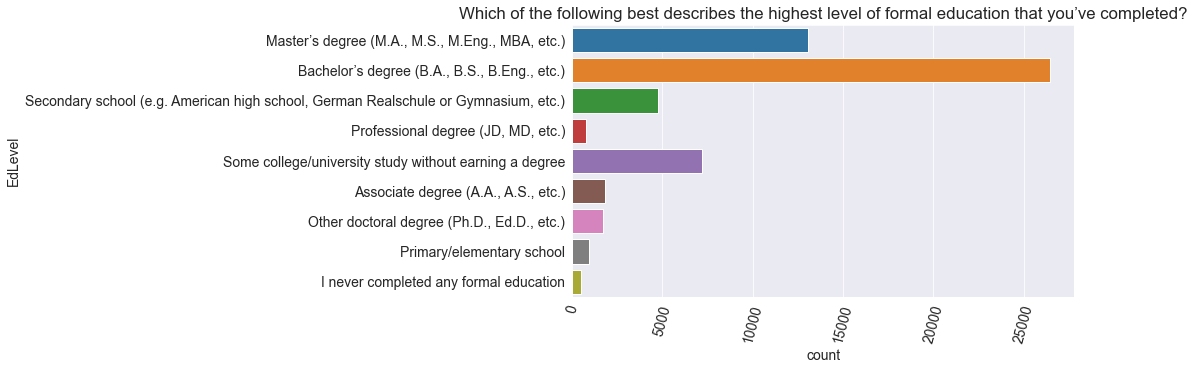

In [92]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title(schema.EdLevel);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

**Exercises**: The graph currently shows the number of respondents for each option. Can you modify it to show the percentage instead?

**Exercise**

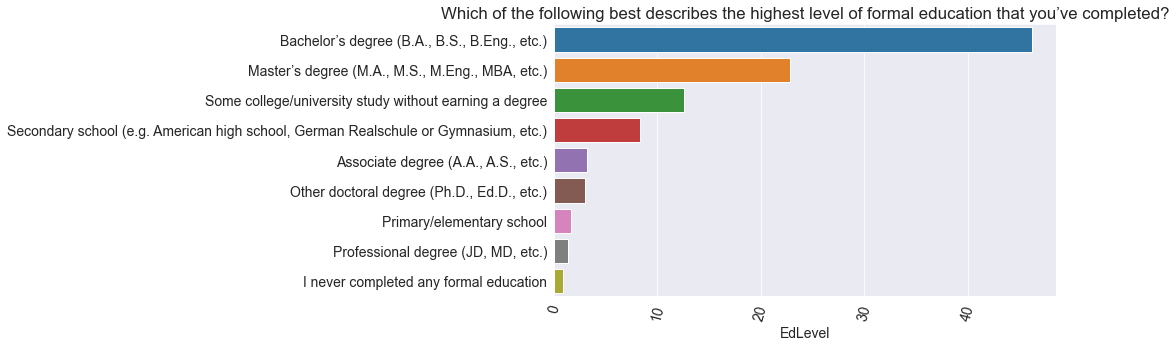

In [93]:
# Education by percentage
EdLevel_pct = survey_df.EdLevel.value_counts() * 100 / survey_df.EdLevel.count()

sns.barplot(x=EdLevel_pct,y=EdLevel_pct.index)
plt.xticks(rotation=75)
plt.title(schema.EdLevel);

Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [94]:
schema.UndergradMajor

'What was your primary field of study?'

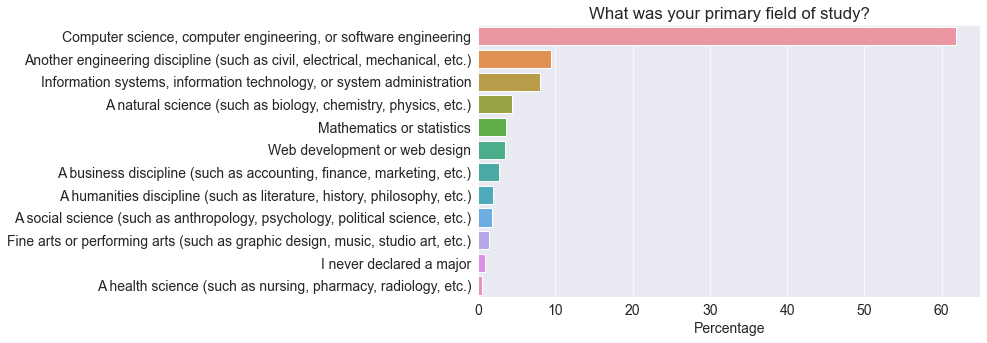

In [95]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

**Exercises**: Analyze the `NEWEdImpt` column for respondents who hold some college degree vs. those who don't. Do you notice any difference in opinion?


**Exercise**

In [96]:
print(schema.NEWEdImpt, "\n", schema.EdLevel)

How important is a formal education, such as a university degree in computer science, to your career? 
 Which of the following best describes the highest level of formal education that you’ve completed?


In [97]:
survey_df.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26476
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13059
Some college/university study without earning a degree                                 7186
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4754
Associate degree (A.A., A.S., etc.)                                                    1841
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1685
Primary/elementary school                                                               933
Professional degree (JD, MD, etc.)                                                      797
I never completed any formal education                                                  486
Name: EdLevel, dtype: int64

In [98]:
holdcollegedegree = ['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                                            'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
                                            'Associate degree (A.A., A.S., etc.)',
                                            'Other doctoral degree (Ph.D., Ed.D., etc.)',
                                            'Professional degree (JD, MD, etc.)']
nocollegedegree = ['Some college/university study without earning a degree',
                                    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                                    'Primary/elementary school',
                                    'I never completed any formal education']

edlevel_conditions = [survey_df.EdLevel.isin(holdcollegedegree),
              survey_df.EdLevel.isin(nocollegedegree)]

edlevel_values = [True,False]

In [99]:
survey_df['HoldCollegeDegree'] = np.select(edlevel_conditions, edlevel_values)

In [100]:
survey_df.NEWEdImpt.value_counts()

Fairly important                      12635
Very important                        11819
Somewhat important                    11349
Not at all important/not necessary     7725
Critically important                   4737
Name: NEWEdImpt, dtype: int64

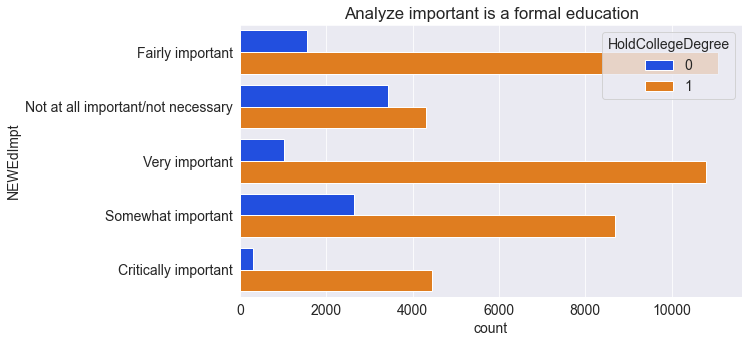

In [101]:
plt.title("Analyze important is a formal education")
sns.countplot(y=survey_df.NEWEdImpt, hue=survey_df.HoldCollegeDegree, data=survey_df, palette="bright");

### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [156]:
survey_df.Employment.value_counts(normalize=True)*100

Employed full-time                                      70.898698
Student                                                 12.226567
Independent contractor, freelancer, or self-employed     8.847223
Not employed, but looking for work                       3.679276
Employed part-time                                       3.465712
Not employed, and not looking for work                   0.504075
Retired                                                  0.378449
Name: Employment, dtype: float64

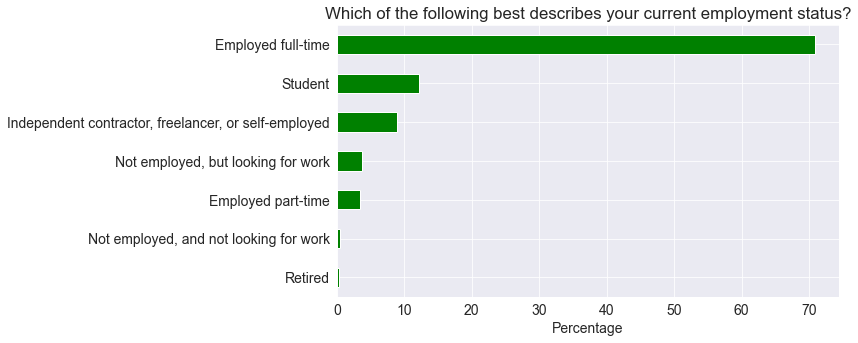

In [102]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers.

**Exercise**: Add a new column `EmploymentType` containing the values `Enthusiast` (student or not employed but looking for work), `Professional` (employed full-time, part-time or freelancing), and `Other` (not employed or retired). For each of the graphs that follow, show a comparison between `Enthusiast` and `Professional`.



**Exercise**

In [103]:
emp_type_enthusiast = ['Student', 'Not employed, but looking for work']

emp_type_professional = ['Employed full-time', 'Employed part-time', 'Independent contractor, freelancer, or self-employed']

emp_type_other = ['Not employed, and not looking for work', 'Retired']

emp_type_conditions = [survey_df.Employment.isin(emp_type_enthusiast),
                        survey_df.Employment.isin(emp_type_professional),
                        survey_df.Employment.isin(emp_type_other)]

emp_type_values = ["Enthusiast", "Professional", "Other"]

In [104]:
survey_df["EmploymentType"] = np.select(emp_type_conditions, emp_type_values)

In [110]:
survey_df["EmploymentType"].unique()

array(['Professional', '0', 'Enthusiast', 'Other'], dtype=object)

The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [111]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [115]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                 4406
Developer, back-end                                                                                                                                                                                                                   3074
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                        2226
Developer, back-end;Developer, full-stack                                                                                                                                                                                             1470
Developer, front-end                                        

Let's define a helper function that turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.

In [120]:
survey_df.DevType[survey_df.DevType.notnull()]

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
5          Designer;Developer, front-end;Developer, mobile
6        Developer, back-end;Developer, front-end;Devel...
7        Developer, back-end;Developer, desktop or ente...
                               ...                        
64582    Developer, back-end;Developer, desktop or ente...
64583                                    Developer, mobile
64585        Data scientist or machine learning specialist
64587    Data or business analyst;Developer, mobile;Sen...
64590                                  Senior executive/VP
Name: DevType, Length: 49166, dtype: object

In [121]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [122]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [123]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64590,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64591,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.


In [124]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              27100
Developer, full-stack                            26982
Developer, front-end                             18185
Developer, desktop or enterprise applications    11714
Developer, mobile                                 9444
DevOps specialist                                 5927
Database administrator                            5676
Designer                                          5268
System administrator                              5196
Developer, embedded applications or devices       4718
Data or business analyst                          3980
Data scientist or machine learning specialist     3958
Developer, QA or test                             3899
Engineer, data                                    3714
Academic researcher                               3514
Educator                                          2905
Developer, game or graphics                       2774
Engineering manager                               2702
Product ma

In [ ]:
# dev_type_df.count()

As one might expect, the most common roles include "Developer" in the name. 


**Exercise**: Can you figure out what percentage of respondents work in roles related to data science?

**Exercise**

In [125]:
# Can you figure out what percentage of respondents work in roles related to data science?
data_science_pct = (dev_type_totals[["Data or business analyst","Data scientist or machine learning specialist","Engineer, data"]].values.sum() / dev_type_df.shape[0]) * 100
data_science_pct

18.03854787522254

18% of the respondents work in roles related to data science

In [126]:
dev_type_totals[["Data or business analyst","Data scientist or machine learning specialist","Engineer, data"]].values.sum()

11652

## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

#### Q: What are the most popular programming languages in 2020? 

To answer, this we can use the `LanguageWorkedWith` column. Similar to `DevType`, respondents were allowed to choose multiple options here.

In [127]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64590                                                  NaN
64591    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64592                                                  NaN
64593                                             HTML/CSS
64594                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64595, dtype: object

First, we'll split this column into a data frame containing a column of each language listed in the options.

In [128]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [129]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64590,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64591,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64593,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.


In [130]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.842093
HTML/CSS                 55.727223
SQL                      48.383002
Python                   38.998374
Java                     35.632789
Bash/Shell/PowerShell    29.198854
C#                       27.776144
PHP                      23.094667
TypeScript               22.416596
C++                      21.151792
C                        19.290967
Go                        7.749826
Kotlin                    6.892174
Ruby                      6.220296
Assembly                  5.436953
VBA                       5.381221
Swift                     5.240344
R                         5.063859
Rust                      4.487963
Objective-C               3.605542
Dart                      3.517300
Scala                     3.142658
Perl                      2.747891
Haskell                   1.856181
Julia                     0.780246
dtype: float64

We can plot this information using a horizontal bar chart.

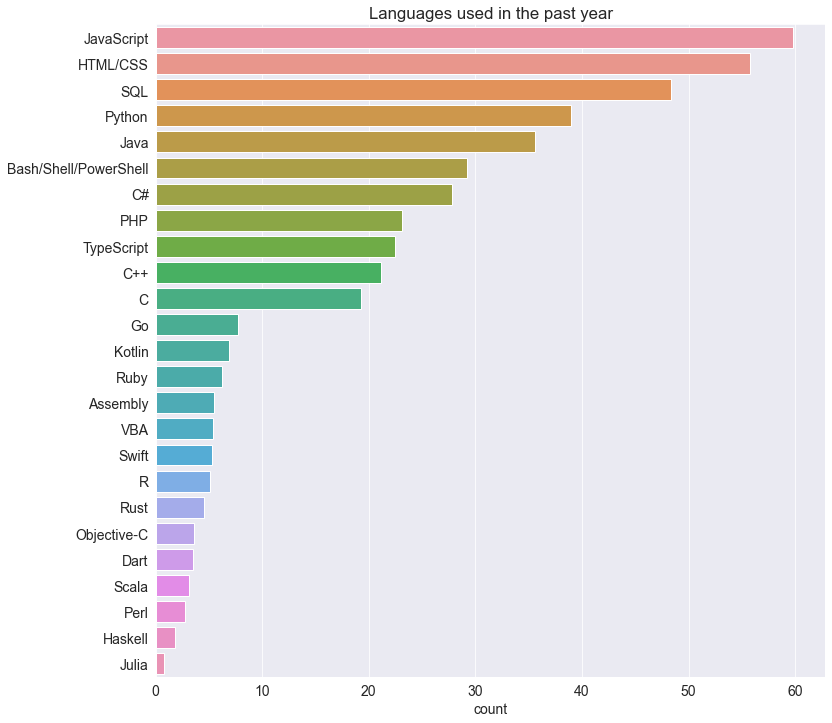

In [131]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades.


#### Q: Which languages are the most people interested to learn over the next year?

For this, we can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [132]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.142503
JavaScript               40.402508
HTML/CSS                 31.977707
SQL                      30.774828
TypeScript               26.466445
C#                       21.037232
Java                     20.476817
Go                       19.458162
Bash/Shell/PowerShell    18.038548
Rust                     16.286090
C++                      15.039864
Kotlin                   14.792167
PHP                      10.912609
C                         9.384627
Swift                     8.717393
Dart                      7.310163
R                         6.563976
Ruby                      6.410713
Scala                     5.330134
Haskell                   4.585494
Assembly                  3.766545
Julia                     2.532704
Objective-C               2.345383
Perl                      1.757102
VBA                       1.608484
dtype: float64

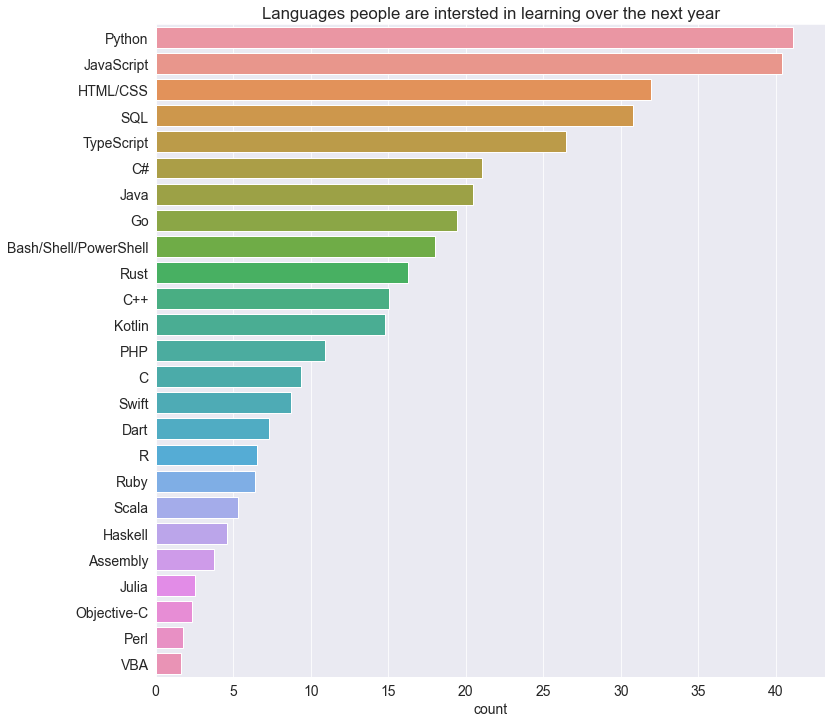

In [133]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Once again, it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc. We're using Python for this very analysis, so we're in good company!


#### Q:  Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

While this question may seem tricky at first, it's straightforward to solve using Pandas array operations. Here's what we can do:

- Create a new data frame `languages_loved_df` that contains a `True` value for a language only if the corresponding values in `languages_worked_df` and `languages_interested_df` are both `True`
- Take the column-wise sum of `languages_loved_df` and divide it by the column-wise sum of `languages_worked_df` to get the percentage of respondents who "love" the language
- Sort the results in decreasing order and plot a horizontal bar graph

In [134]:
languages_loved_df = languages_worked_df & languages_interested_df

In [135]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

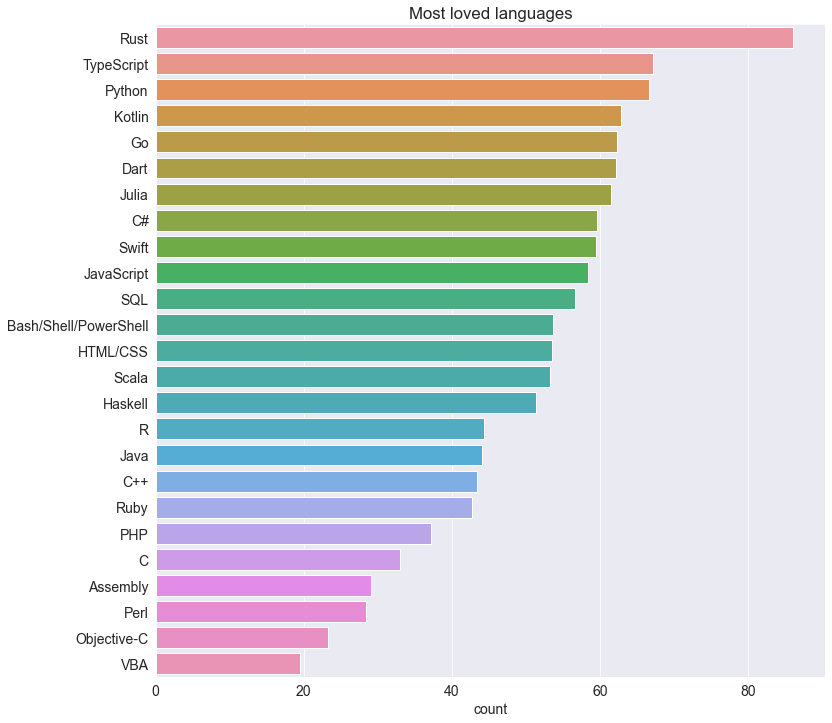

In [136]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

[Rust](https://www.rust-lang.org) has been StackOverflow's most-loved language for [four years in a row](https://stackoverflow.blog/2020/01/20/what-is-rust-and-why-is-it-so-popular/). The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.


**Exercise:** What are the most dreaded languages, i.e., languages which people have used in the past year but do not want to learn/use over the next year. Hint: `~languages_interested_df`.

**Exercise**

In [137]:
languages_dreaded_df = languages_worked_df & ~languages_interested_df

In [138]:
languages_dreaded_percentages = (languages_dreaded_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

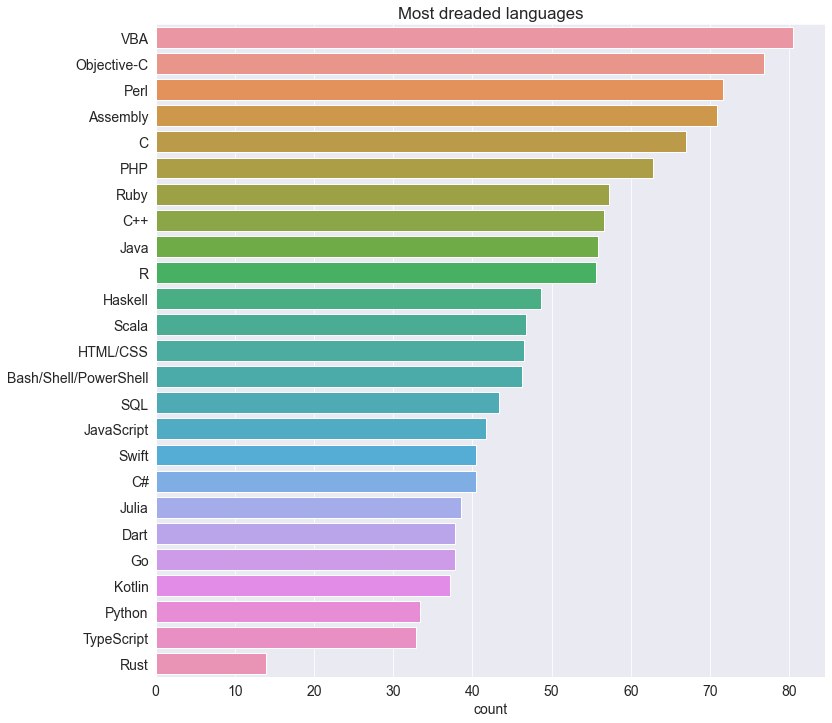

In [139]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_dreaded_percentages, y=languages_dreaded_percentages.index)
plt.title("Most dreaded languages");
plt.xlabel('count');

#### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

To answer this question, we'll need to use the `groupby` data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries with more than 250 respondents.

In [140]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [141]:
countries_df

,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
Mozambique,NaN
Nauru,NaN
Sierra Leone,NaN


In [142]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [143]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Vietnam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.


#### Q: How important is it to start young to build a career in programming?

Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

In [145]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

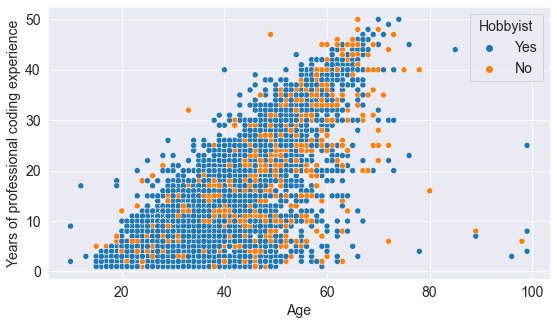

In [146]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

You can see points all over the graph, which indicates that you can **start programming professionally at any age**. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

We can also view the distribution of the `Age1stCode` column to see when the respondents tried programming for the first time.

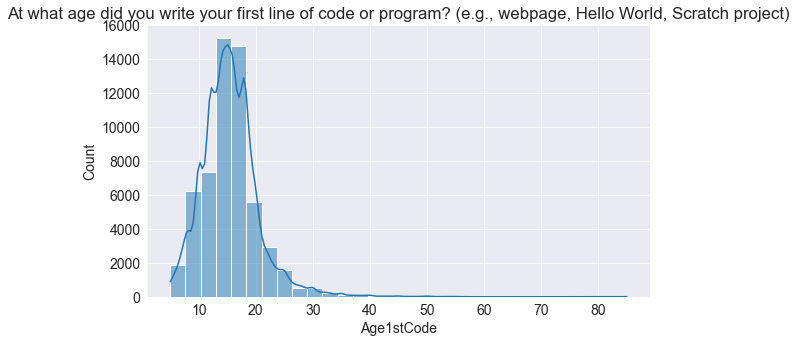

In [147]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

As you might expect, most people seem to have had some exposure to programming before the age of 40. However, but there are people of all ages and walks of life learning to code.



## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.


## Exercises

There's a wealth of information to be discovered using the survey, and we've barely scratched the surface. Here are some ideas for further exploration:

- Repeat the analysis for different age groups & genders, and compare the results
- Pick a different set of columns (we chose 20 out of 65) to analyze other facets of the data
- Prepare an analysis focusing on diversity - and identify areas where underrepresented communities are at par with the majority (e.g., education) and where they aren't (e.g., salaries)
- Compare the results of this year's survey with the previous years and identify interesting trends


## References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

- Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets

